In [2]:
import urllib
import string
import numpy as np
import pandas as pd
import _pickle as cPickle
from nltk.corpus import stopwords
from time import time
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data from ArXiv

In [3]:
data_dfKeys = ['id','authors','published','title','abstitle',"prim_cat"]
data_df = pd.DataFrame(columns=data_dfKeys)

tmp_dict = {}
for year in range(1992,2018):
    filename = "../Arxiv_DataSet/ArXivCondMat_"+str(year)+".pickle"
    tmp_df = pd.read_pickle(filename)
    tmp_dict[year] = len(tmp_df)
    #print year, len(tmp_df)
    data_df = data_df.append(tmp_df, ignore_index=True)
del tmp_dict[2017]

25 25
Coefficients:  [695.29230769]
Intercept:  [-1384459.50461538]


/home/npatel/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


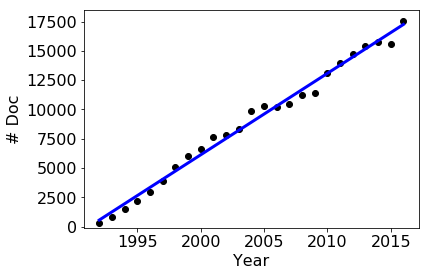

In [4]:
lists = sorted(tmp_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
x = np.asarray(x).reshape(-1,1)
y = np.asarray(y).reshape(-1,1)
regr = sklearn.linear_model.LinearRegression()
print (len(x), len(y))
model = regr.fit(x,y)
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue',linewidth=3)
plt.xlabel("Year",size=16)
plt.ylabel("# Doc",size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylim(ymin=-100)
print('Coefficients: ', regr.coef_[0])
print("Intercept: ", regr.intercept_)

In [5]:
print("total number of documents: ", len(data_df))
data_df.head()

total number of documents:  224607


,id,authors,published,title,abstitle,prim_cat
0,cond-mat/9603180,"Juan M. LÃ³pez, Miguel A. RodrÃ­guez",unpublished,lack of selfaffinity and anomalous roughening ...,lack selfaffinity anomalous roughening growth ...,cond-mat
1,cond-mat/9204001,"Subir Sachdev, Jinwu Ye",Phys.Rev.Lett. 69 (1992) 2411,universal quantum critical dynamics of twodime...,universal quantum critical dynamics twodimensi...,cond-mat
2,cond-mat/9204002,Alexander Balatsky,DOI:10.1142/S0217979292000463,spin singlet quantum hall effect and nonabelia...,spin singlet quantum hall effect nonabelian la...,cond-mat
3,cond-mat/9204003,"Alexander Balatsky, Elihu Abrahams",unpublished,a novel class of singlet superconductors,novel class singlet superconductors new class ...,cond-mat
4,cond-mat/9204004,"Srinandan Dasmahapatra, Rinat Kedem, Barry M. ...",unpublished,physics beyond quasiparticles spectrum and com...,physics beyond quasiparticles spectrum complet...,cond-mat


In [6]:
print("Number of categories on ArXiv: ", len(data_df["prim_cat"].unique()))
print("Categories on ArXiv: ", data_df["prim_cat"].unique())

Number of categories on ArXiv:  10
Categories on ArXiv:  ['cond-mat' 'stat-mech' 'supr-con' 'dis-nn' 'mes-hall' 'str-el' 'mtrl-sci'
 'other' 'soft' 'quant-gas']


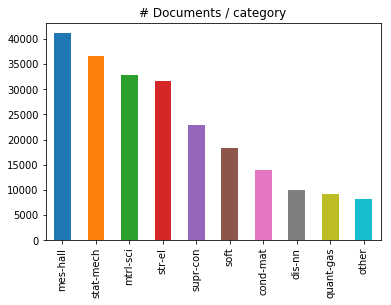

In [13]:
cat_count = pd.Series.value_counts(data_df['prim_cat'])
cat_count.plot.bar(title="# Documents / category")

In [14]:
len(data_df)

224607

## Load Saved Model and Model Parameters

In [15]:
tf = cPickle.load(open('model_parameters/tf.p','rb'),encoding='iso-8859-1')

In [16]:
tfidf = cPickle.load(open('model_parameters/tfidf.p','rb'),encoding='iso-8859-1')

In [17]:
tfidf_feature_names = cPickle.load(open('model_parameters/tfidf_feature_names.p','rb'),encoding='iso-8859-1')

In [18]:
lda = cPickle.load(open('model_parameters/LDAclassifier.model','rb'),encoding='iso-8859-1')

## Get predictions for retrieval tasks

In [79]:
## Get preditions to find nearest neighbors
pred = [lda.transform(tf[index]) for index in range(0,len(data_df))]
pred = np.array(pred)

In [80]:
cPickle.dump(pred, open('model_parameters/pred.p', 'wb')) 

In [81]:
pred = cPickle.load(open('model_parameters/pred.p','rb'),encoding='iso-8859-1')

In [82]:
print(pred[0])
print(pred[1])
print(pred[2])
print(pred[3])

[[0.00076923 0.00076923 0.00076923 0.00076923 0.02408373 0.10778021
  0.04915067 0.42685684 0.0362399  0.00076923 0.00076923 0.02573607
  0.00076923 0.00076923 0.00076923 0.00076923 0.19945172 0.00076923
  0.00076923 0.00076923 0.11762393 0.00076923 0.00076923 0.00076923
  0.00076923]]
[[0.00072727 0.01989894 0.10164076 0.05894787 0.00072727 0.00072727
  0.33052295 0.02092011 0.00072727 0.00072727 0.00072727 0.00072727
  0.00072727 0.00072727 0.01890909 0.00072727 0.366348   0.00072727
  0.00072727 0.00072727 0.00072727 0.02313426 0.00072727 0.02270641
  0.02606252]]
[[3.88349515e-04 3.09780175e-02 3.88349515e-04 3.88349515e-04
  3.88349515e-04 3.88349515e-04 6.64758221e-01 3.88349515e-04
  1.08385516e-01 3.88349515e-04 3.88349515e-04 3.88349515e-04
  3.88349515e-04 3.88349515e-04 3.88349515e-04 3.88349515e-04
  3.88349515e-04 3.88349515e-04 3.88349515e-04 3.88349515e-04
  3.88349515e-04 5.82668514e-02 3.88349515e-04 1.29844404e-01
  3.88349515e-04]]
[[0.00102564 0.04796275 0.38740099 

In [83]:
def QueryLda(model,data,q,kneighbors,predictions,tfidf):
    from scipy.spatial import distance
    N = len(predictions)
    query = predictions[q]
    dis = np.array([(int(i),distance.euclidean(predictions[i],query)) for i in range(0,N)])
    dis = dis[dis[:,1].argsort()]
    #print(dis[0:kneighbors])
    return [int(dis[x,0]) for x in range(0,kneighbors)]

In [84]:
def printneighbors(nb,model,data,tfidf,predictions):
    for n in nb:
        print (n)
        print (data.loc[n])
        print (data_df['abstitle'][n])
        print (predictions[n])
    print ( " ")

In [85]:
def tfidfToWords(doc, tf_idf, feature_names,highestn):
    feature_index = tf_idf[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tf_idf[doc, x] for x in feature_index])
    out = []
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        tmp = [w, s]
        out.append(tmp)
    out = np.array(out)
    perm = np.argsort(out[:,1])
    out = out[perm][::-1]
#     for k in range(0,highestn):
#         print out[k]
    return out[:highestn]

In [86]:
def plotbar(x,doc,outfile):
    import matplotlib.pyplot as plt
    %matplotlib inline
    category = x[:,0]
    category_counts = x[:,1]
    indexes = np.arange(len(category))
    width=0.7
    plt.figure(figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
    titlelabel = "term frequency (tf) of document: " + str(doc)
    plt.title(titlelabel,fontsize=25, color='black')
    plt.bar(indexes,category_counts,width)
    plt.xticks(indexes+width*0.5,category,rotation='vertical',fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.savefig(outfile)
    plt.show()

#### Document: 365

In [87]:
id = 356
neigh = QueryLda(lda,data_df,id,6,pred,tfidf)
printneighbors(neigh,lda,data_df,tfidf,pred)

356
id                                            cond-mat/9302026
authors                                             Ko Okumura
published                             DOI:10.1143/JPSJ.62.1922
title        the supergroup umn with regard to electronic h...
abstitle     supergroup umn regard electronic hamiltonians ...
prim_cat                                              cond-mat
Name: 356, dtype: object
supergroup umn regard electronic hamiltonians study umn supergroup keeping mind connection electronic hamiltonians explicitly shown generators supergroup unn expressed clifford operators fermi operators multiband supersymmetric electronic model suggested
[[0.00137931 0.00137931 0.22615766 0.00137931 0.00137931 0.00137931
  0.05626555 0.00137931 0.43510004 0.00137931 0.00137931 0.00137931
  0.00137931 0.00137931 0.00137931 0.03607659 0.00137931 0.00137931
  0.00137931 0.18093047 0.00137931 0.00137931 0.00137931 0.03926279
  0.00137931]]
186195
id                                          

In [52]:
#wordcount = np.array(tfidfToWords(id,tf,tfidf_feature_names,20))
#plotbar(wordcount,id,"query1.pdf")

### Document 21281

In [53]:
id = 21281
neigh = QueryLda(lda,data_df,id,6,pred,tfidf)
printneighbors(neigh,lda,data_df,tfidf,pred)

21281
id                                            cond-mat/9910179
authors      Frank K. Wilhelm, Gerd Schoen, Gergely T. Zimanyi
published                                          unpublished
title        superconducting singlecharge transistor in a t...
abstitle     superconducting singlecharge transistor tunabl...
prim_cat                                              mes-hall
Name: 21281, dtype: object
superconducting singlecharge transistor tunable dissipative environment study superconducting singlecharge transistor coherence cooper pair tunneling destroyed coupling tunable dissipative environment sequential tunneling cotunneling processes analyzed construct shape conductance peaks dependence dissipation temperature unexpected features found due crossover two distinct regimes one environmentassisted environmentdominated several predictions confirmed recent experiments model results apply also dynamics josephson junction quantum bits conducting ground plane thus explaining influe

In [56]:
#wordcount = np.array(tfidfToWords(21281,tf,tfidf_feature_names,20))
#plotbar(wordcount,21281,"query2.pdf")

### Document 32461

In [55]:
#neigh = QueryLda(lda,data_df,32461,10,pred,tf)
#printneighbors(neigh,lda,data_df,tf)
#tfidfToWords(32461,tf,tfidf_feature_names,20)

In [57]:
#wordcount = np.array(tfidfToWords(32461,tf,tfidf_feature_names,30))
#plotbar(wordcount,32461,"query3.pdf")

### Document 209992

In [23]:
data_df[data_df['id']=='1604.03621']

,id,authors,published,title,abstitle,prim_cat
209992,1604.03621,"Niravkumar D. Patel, Alberto Nocera, Gonzalo A...",DOI:10.1103/PhysRevB.94.075119,magnetic properties and pairing tendencies of ...,magnetic properties pairing tendencies ironbas...,str-el


In [58]:
id = 209992
neigh = QueryLda(lda,data_df,id,6,pred,tfidf)
printneighbors(neigh,lda,data_df,tfidf,pred)

209992
id                                                  1604.03621
authors      Niravkumar D. Patel, Alberto Nocera, Gonzalo A...
published                       DOI:10.1103/PhysRevB.94.075119
title        magnetic properties and pairing tendencies of ...
abstitle     magnetic properties pairing tendencies ironbas...
prim_cat                                                str-el
Name: 209992, dtype: object
magnetic properties pairing tendencies ironbased superconducting ladder bafe2s3 combined ab initio density matrix renormalization group study recent discovery superconductivity high pressure twoleg ladder compound bafe2s3 h takahashi et al nature materials 14 1008 2015 opens broad avenue research represents first report pairing tendencies quasi onedimensional ironbased high critical temperature superconductor similarly case cuprates ladders chains far accurately studied using manybody techniques model hamiltonians layered counterparts particularly several orbitals active publicati

In [60]:
#wordcount = np.array(tfidfToWords(209992,tf,tfidf_feature_names,30))
#plotbar(wordcount,209992,"query4.pdf")

### Document 168936

In [26]:
data_df[data_df['id']=='1309.5119']

,id,authors,published,title,abstitle,prim_cat
168936,1309.5119,"K. A. Al-Hassanieh, Julian Rincon, E. Dagotto,...","Phys. Rev. B 88, 045107 (2013)",wave packet dynamics in the onedimensional ext...,wave packet dynamics onedimensional extended h...,str-el


In [88]:
id = 168936
neigh = QueryLda(lda,data_df,id,6,pred,tfidf)
printneighbors(neigh,lda,data_df,tfidf,pred)

168936
id                                                   1309.5119
authors      K. A. Al-Hassanieh, Julian Rincon, E. Dagotto,...
published                       Phys. Rev. B 88, 045107 (2013)
title        wave packet dynamics in the onedimensional ext...
abstitle     wave packet dynamics onedimensional extended h...
prim_cat                                                str-el
Name: 168936, dtype: object
wave packet dynamics onedimensional extended hubbard model using timedependent densitymatrix renormalization group study time evolution electronic wave packets onedimensional extended hubbard model onsite nearest neighbor repulsion u v respectively expected wave packets separate spinonly chargeonly excitations spincharge separation charge spin velocities exhibit nonmonotonic dependence v small intermediate values v velocities increase v however charge velocity exhibits stronger dependence spin leading pronounced spincharge separation charge fractionalization hand weakly affected v

In [89]:
#wordcount = np.array(tfidfToWords(168936,tf,tfidf_feature_names,30))
#plotbar(wordcount,168936,"query5.pdf")